# Customer Churn Analysis

## Dataset Info - dataset contains telecom customer data and customers left last month 

In [7]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import recall_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from imblearn.combine import SMOTEENN
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC

In [8]:
# Loading the dataset
data=pd.read_csv(r"C:\Users\siddhant\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
data.shape

(7043, 21)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [12]:
data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [13]:
data['Churn'].value_counts()/len(data['Churn'])*100

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

There is a big imbalance in the dataset , ratio : 73:27

total charges are object data type , we have to convert them to numeric

In [14]:
telco_data=data.copy()

In [15]:
telco_data['TotalCharges']=pd.to_numeric(telco_data['TotalCharges'],errors='coerce') 

In [16]:
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [17]:
telco_data.dropna(inplace=True)

In [18]:
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [19]:
telco_data['tenure'].max()

72

In [20]:
# Group the tenure in bins of 12 months
labels=["{0}-{1}".format(i,i+11) for i in range(1,72,12)]
telco_data['tenure_group']=pd.cut(telco_data['tenure'],range(1,80,12),right=False,labels=labels)

In [21]:
telco_data['tenure_group'].value_counts()

tenure_group
1-12     2175
61-72    1407
13-24    1024
25-36     832
49-60     832
37-48     762
Name: count, dtype: int64

In [22]:
# convert churn values of no to 0 and yes to 1 
telco_data['Churn']=np.where(telco_data['Churn']=='Yes',1,0)

In [23]:
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1-12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25-36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1-12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37-48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1-12


In [24]:
telco_data.drop(['customerID','tenure'],axis=1,inplace=True)

In [25]:
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1-12


## Convert all categorical variables into dummy variables

In [26]:
telco_dummy=pd.get_dummies(telco_data,drop_first=True)
telco_dummy.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,0,False,True,False,False,True,False,...,False,True,False,True,False,False,False,False,False,False
1,0,56.95,1889.50,0,True,False,False,True,False,False,...,False,False,False,False,True,False,True,False,False,False
2,0,53.85,108.15,1,True,False,False,True,False,False,...,False,True,False,False,True,False,False,False,False,False
3,0,42.30,1840.75,0,True,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,False,False,False,True,False,False,...,False,True,False,True,False,False,False,False,False,False


## Finding correlation of churn with all features

In [27]:
telco_dummy.corr()['Churn'].sort_values(ascending=False)

Churn                                    1.000000
InternetService_Fiber optic              0.307463
PaymentMethod_Electronic check           0.301455
MonthlyCharges                           0.192858
PaperlessBilling_Yes                     0.191454
SeniorCitizen                            0.150541
StreamingTV_Yes                          0.063254
StreamingMovies_Yes                      0.060860
MultipleLines_Yes                        0.040033
tenure_group_13-24                       0.019929
PhoneService_Yes                         0.011691
gender_Male                             -0.008545
MultipleLines_No phone service          -0.011691
tenure_group_25-36                      -0.040997
tenure_group_37-48                      -0.059579
DeviceProtection_Yes                    -0.066193
OnlineBackup_Yes                        -0.082307
PaymentMethod_Mailed check              -0.090773
tenure_group_49-60                      -0.100800
PaymentMethod_Credit card (automatic)   -0.134687


<Axes: >

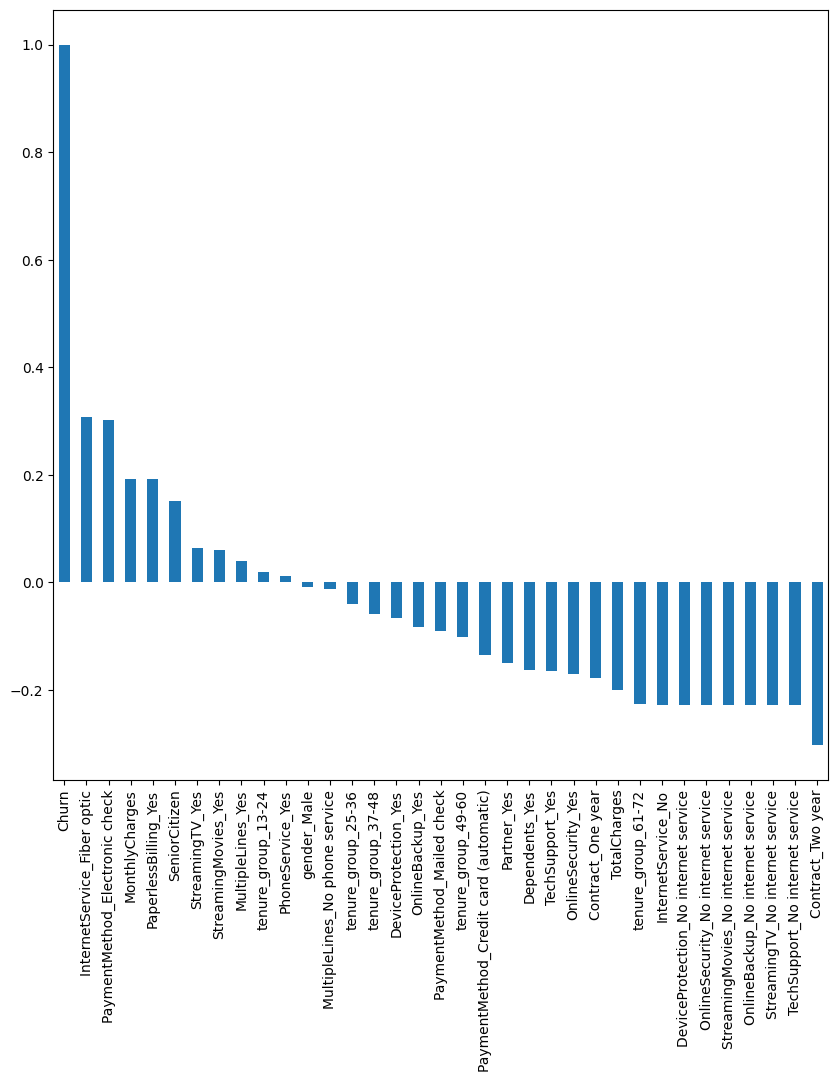

In [28]:
plt.figure(figsize=(10,10))
telco_dummy.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')


## Model Building Starts Here

In [29]:
y=telco_dummy['Churn']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

In [30]:
y.shape

(7032,)

In [31]:
x=telco_dummy.drop(['Churn'],axis=True)
x.head(10)

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,False,True,False,False,True,False,False,...,False,True,False,True,False,False,False,False,False,False
1,0,56.95,1889.50,True,False,False,True,False,False,False,...,False,False,False,False,True,False,True,False,False,False
2,0,53.85,108.15,True,False,False,True,False,False,False,...,False,True,False,False,True,False,False,False,False,False
3,0,42.30,1840.75,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,False,False,False,True,False,False,True,...,False,True,False,True,False,False,False,False,False,False
5,0,99.65,820.50,False,False,False,True,False,True,True,...,False,True,False,True,False,False,False,False,False,False
6,0,89.10,1949.40,True,False,True,True,False,True,True,...,False,True,True,False,False,True,False,False,False,False
7,0,29.75,301.90,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
8,0,104.80,3046.05,False,True,False,True,False,True,True,...,False,True,False,True,False,False,True,False,False,False
9,0,56.15,3487.95,True,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

## Decision Tree Classifier

In [33]:
model_dt=DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=40)


In [34]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=40)

In [35]:
y_predict=model_dt.predict(x_test)

In [36]:
y_predict

array([0, 1, 1, ..., 0, 0, 1])

## Model Performance Metrices Without Resampling Using Decison Tree Classifier

In [37]:
model_dt.score(x_test,y_test)

0.79478672985782

In [38]:
print(classification_report(y_test,y_predict,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1558
           1       0.61      0.58      0.60       552

    accuracy                           0.79      2110
   macro avg       0.73      0.72      0.73      2110
weighted avg       0.79      0.79      0.79      2110



In [39]:
print(confusion_matrix(y_test,y_predict))

[[1358  200]
 [ 233  319]]


Precision , recall is low because dataset has imbalance, there are many no churn samples as compared to churn samples, so model just randomly guess no churn to get high accuracy, we have to oversamples churn samples 

 Using SMOTEENN = SMOTE + ENN , SMOTE creates duplicates samples for churn and ENN cleans the data from noise

## Resampling using SMOTEENN

In [40]:
sm=SMOTEENN()
x_resampled,y_resampled=sm.fit_resample(x,y)

C:\Users\siddhant\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\siddhant\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\siddhant\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  w

In [41]:
xr_train,xr_test,yr_train,yr_test=train_test_split(x_resampled,y_resampled)

## Hyperparameter Tuning For Decision Tree Classifier

In [42]:
model_dt_resampled=DecisionTreeClassifier()


In [50]:
params={
  'max_depth':[3,4,5,6,7,8],
  'min_samples_leaf':[4,5,6,7,8,9,10],
  'criterion':['gini','entropy']
}
random_model=RandomizedSearchCV(estimator=model_dt_resampled,param_distributions=params,cv=2,n_iter=20,random_state=40)

In [51]:
random_model.fit(xr_train,yr_train)

RandomizedSearchCV(cv=2, estimator=DecisionTreeClassifier(), n_iter=20,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5, 6, 7, 8],
                                        'min_samples_leaf': [4, 5, 6, 7, 8, 9,
                                                             10]},
                   random_state=40)

In [52]:
random_model.best_params_

{'min_samples_leaf': 6, 'max_depth': 7, 'criterion': 'entropy'}

## Performance Metrices After Resampling Using Decision Tree Classifier

In [53]:
yr_predict=random_model.best_estimator_.predict(xr_test)

In [55]:
random_model.best_estimator_.score(xr_test,yr_test)

0.923448275862069

In [56]:
print(classification_report(yr_test,yr_predict))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       629
           1       0.93      0.94      0.93       821

    accuracy                           0.92      1450
   macro avg       0.92      0.92      0.92      1450
weighted avg       0.92      0.92      0.92      1450



In [57]:
print(confusion_matrix(yr_test,yr_predict))

[[571  58]
 [ 53 768]]


## Random Forest Classifier 

## Hyperparameter Tuning For Random Forest Classifier

In [58]:
model_rf=RandomForestClassifier()

In [63]:
params={
  'n_estimators':[100,120,150,170],
  'max_depth':[3,4,5,6,7,8],
  'min_samples_leaf':[4,5,6,7,8,9,10],
  'criterion':['gini','entropy']
}
random_model_rf=RandomizedSearchCV(estimator=model_rf,param_distributions=params,cv=2,n_iter=20,random_state=40)

In [64]:
random_model_rf.fit(xr_train,yr_train)

RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5, 6, 7, 8],
                                        'min_samples_leaf': [4, 5, 6, 7, 8, 9,
                                                             10],
                                        'n_estimators': [100, 120, 150, 170]},
                   random_state=40)

In [65]:
random_model_rf.best_params_

{'n_estimators': 150,
 'min_samples_leaf': 4,
 'max_depth': 8,
 'criterion': 'gini'}

In [66]:
y_rf_predict=random_model_rf.predict(xr_test)

## Performance Metrices Using Random Forest Classifier 

In [67]:
random_model_rf.score(xr_test,yr_test)

0.9344827586206896

In [68]:
print(classification_report(yr_test,y_rf_predict))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       629
           1       0.93      0.96      0.94       821

    accuracy                           0.93      1450
   macro avg       0.94      0.93      0.93      1450
weighted avg       0.93      0.93      0.93      1450



In [69]:
print(confusion_matrix(yr_test,y_rf_predict))

[[567  62]
 [ 33 788]]


## XGBoost Classifier

## Hyperparameter Tuning For XG Boost Classifier

In [70]:
model_xgb=XGBClassifier()

In [77]:
params={
   'n_estimators':[80,100,130,150],
    'max_depth':[4,5,6,7,8,9],
    'learning_rate':[0.05,0.1,0.2,0.3]
}
random_model_xgb=RandomizedSearchCV(estimator=model_xgb,param_distributions=params,random_state=50,cv=3,n_iter=20)

In [78]:
random_model_xgb.fit(xr_train,yr_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=20,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.2, 0.3],
                                        'max_depth': [4, 5, 6, 7, 8, 9],
                                        'n_estimators': [80, 100, 130, 150]},
                   random_state=50)

In [79]:
random_model_xgb.best_params_

{'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.3}

In [80]:
y_xgb_pred=random_model_xgb.predict(xr_test)

## Performance metrices using XGBoost Classifier

In [82]:
random_model_xgb.score(xr_test,yr_test)

0.9489655172413793

In [83]:
print(confusion_matrix(yr_test,y_xgb_pred))

[[589  40]
 [ 34 787]]


In [84]:
print(classification_report(yr_test,y_xgb_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       629
           1       0.95      0.96      0.96       821

    accuracy                           0.95      1450
   macro avg       0.95      0.95      0.95      1450
weighted avg       0.95      0.95      0.95      1450



## Gradient Boost Classifier

## Hyperparameter Tuning For Gradient Boost Classifier

In [85]:
model_gb = GradientBoostingClassifier()

In [91]:
params={
   'n_estimators':[80,100,130,150],
    'max_depth':[5,6,7,8,9],
    'learning_rate':[0.05,0.1,0.2,0.3]
}
random_model_gb=RandomizedSearchCV(estimator=model_gb,param_distributions=params,random_state=50,cv=2,n_iter=10)

In [92]:
random_model_gb.fit(xr_train,yr_train)

RandomizedSearchCV(cv=2, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.05, 0.1, 0.2, 0.3],
                                        'max_depth': [5, 6, 7, 8, 9],
                                        'n_estimators': [80, 100, 130, 150]},
                   random_state=50)

In [93]:
random_model_gb.best_params_

{'n_estimators': 130, 'max_depth': 6, 'learning_rate': 0.3}

In [94]:
y_gb_pred=random_model_gb.predict(xr_test)

## Performance metrices using Gradient Boost Classifier

In [96]:
random_model_gb.score(xr_test,yr_test)

0.9551724137931035

In [97]:
print(confusion_matrix(yr_test,y_gb_pred))

[[594  35]
 [ 30 791]]


In [98]:
print(classification_report(yr_test,y_gb_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       629
           1       0.96      0.96      0.96       821

    accuracy                           0.96      1450
   macro avg       0.95      0.95      0.95      1450
weighted avg       0.96      0.96      0.96      1450



## Logistic Regression

In [102]:
scaler=StandardScaler()
xr_train_scaled=scaler.fit_transform(xr_train)
xr_test_scaled=scaler.transform(xr_test)

In [103]:
model_lr=LogisticRegression(max_iter=1000)
model_lr.fit(xr_train_scaled,yr_train)

LogisticRegression(max_iter=1000)

In [104]:
y_lr_pred=model_lr.predict(xr_test_scaled)

## Performance metrices using Logistic Regression

In [105]:
model_lr.score(xr_test_scaled,yr_test)

0.9220689655172414

In [106]:
print(confusion_matrix(yr_test,y_lr_pred))

[[578  51]
 [ 62 759]]


In [107]:
print(classification_report(yr_test,y_lr_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       629
           1       0.94      0.92      0.93       821

    accuracy                           0.92      1450
   macro avg       0.92      0.92      0.92      1450
weighted avg       0.92      0.92      0.92      1450



## K Nearest Neighbors

## Hyperparameter Tuning For K Nearest Neighbours

In [112]:
model_knn=KNeighborsClassifier()
param = {
    'n_neighbors': [4,5,6,7],
    'weights': ['uniform', 'distance']
}
random_model_knn=RandomizedSearchCV(estimator=model_knn,param_distributions=param,cv=5,n_iter=20,random_state=42)

In [113]:
random_model_knn.fit(xr_train_scaled,yr_train)

C:\Users\siddhant\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=20,
                   param_distributions={'n_neighbors': [4, 5, 6, 7],
                                        'weights': ['uniform', 'distance']},
                   random_state=42)

In [114]:
random_model_knn.best_params_

{'weights': 'distance', 'n_neighbors': 4}

In [115]:
y_knn_pred=random_model_knn.predict(xr_test_scaled)

## Performance metrices using K Nearest Neighbors

In [116]:
random_model_knn.score(xr_test_scaled,yr_test)

0.9296551724137931

In [117]:
print(confusion_matrix(yr_test,y_knn_pred))

[[555  74]
 [ 28 793]]


In [118]:
print(classification_report(yr_test,y_knn_pred))

              precision    recall  f1-score   support

           0       0.95      0.88      0.92       629
           1       0.91      0.97      0.94       821

    accuracy                           0.93      1450
   macro avg       0.93      0.92      0.93      1450
weighted avg       0.93      0.93      0.93      1450



## SVM With RBF

In [95]:
model_svm=SVC(kernel='rbf',C=1.0,gamma='scale',random_state=44)

In [96]:
model_svm.fit(xr_train_scaled,yr_train)

SVC(random_state=44)

In [97]:
y_svm_pred=model_knn.predict(xr_test_scaled)

## Performance metrices using SVM with RBF

In [99]:
model_svm.score(xr_test_scaled,yr_test)

0.9313244569025928

In [100]:
print(confusion_matrix(yr_test,y_svm_pred))

[[554  65]
 [ 33 775]]


In [101]:
print(classification_report(yr_test,y_svm_pred))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92       619
           1       0.92      0.96      0.94       808

    accuracy                           0.93      1427
   macro avg       0.93      0.93      0.93      1427
weighted avg       0.93      0.93      0.93      1427

